Hate crime has been increasing every year and Black Americans are protesting against it and saying that they are still the victims of hate crimes more than any other group and blaming police for not taking action. In my project , I will try to analyze the Hate crime data gathered from FBI's database for the years 2017-2015. For this project,we will only consider certain race.They are - White, Black , American Indian ,Hispanic/Lation and Asian. We will try to answer these three questions by the end of the project - 
    1. Which race is facing the most hate crimes?
    2. How many percent of those offenders are getting caught/known for each race?
    3. how fast the hate crime is increasing for each race?(the rate)

Variables will be the 5 race that I mentioned.

In [1]:
#Importing neccesary packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

These are the datasets I will be using.
    1. 2015 hate crime statistics- https://ucr.fbi.gov/hate-crime/2015/tables-and-data-declarations/1tabledatadecpdf 
    2. 2016 hate crime statistics- https://ucr.fbi.gov/hate-crime/2016/tables/table-1 
    3. 2017 hate crime statistics- https://ucr.fbi.gov/hate-crime/2017/topic-pages/tables/table-1.xls 

In [2]:
#Scrapping Offense and Known Offenders from Hate crime statistics for 2017
H_C2017 = pd.read_excel(r'C:\Users\Nahin Imtiaz\Downloads\table-1 (1).xls',header=3)
H_C2017 =H_C2017[['Bias motivation','Offenses','Known offenders2']]
H_C2017['Offenses']=pd.to_numeric(H_C2017['Offenses'])
H_C2017['Known offenders2']=pd.to_numeric(H_C2017['Known offenders2'])
# Creating two columns to show Unsolved Cases and Percentage
H_C2017['Unsolved Cases']=H_C2017['Offenses']-H_C2017['Known offenders2']
H_C2017['Percentage']=(H_C2017['Unsolved Cases']/H_C2017['Offenses'])*100

#Scrapping Offense and Known Offenders from Hate crime statistics for 2016
H_C2016 = pd.read_excel(r'C:\Users\Nahin Imtiaz\Downloads\table_1_incidents_offenses_victims_and_known_offenders_by_bias_motivation_2016 (1).xls',header=3)
H_C2016 =H_C2016[['Bias motivation','Offenses','Known offenders2']]
H_C2016['Offenses']=pd.to_numeric(H_C2016['Offenses'])
H_C2016['Known offenders2']=pd.to_numeric(H_C2016['Known offenders2'])
# Creating two columns to show Unsolved Cases and Percentage
H_C2016['Unsolved Cases']=H_C2016['Offenses']-H_C2016['Known offenders2']
H_C2016['Percentage']=(H_C2016['Unsolved Cases']/H_C2016['Offenses'])*100

#Scrapping Offense and Known Offenders from Hate crime statistics for 2015
H_C2015 =  pd.read_excel(r'C:\Users\Nahin Imtiaz\Downloads\table_1_incidents_offenses_victims_and_known_offenders_by_bias_motivation_2015.xls',header=3)
H_C2015 =H_C2015[['Bias motivation','Offenses','Known offenders2']]
H_C2015['Offenses']=pd.to_numeric(H_C2015['Offenses'])
H_C2015['Known offenders2']=pd.to_numeric(H_C2015['Known offenders2'])
# Creating two columns to show Unsolved Cases and Percentage
H_C2015['Unsolved Cases']=H_C2015['Offenses']-H_C2015['Known offenders2']
H_C2015['Percentage']=(H_C2015['Unsolved Cases']/H_C2015['Offenses'])*100


### Creating a Data Frame and a Bar Chart that shows which race is facing the most hate crimes

In [3]:
#Constructing DataFrame of Most  Hate Crimes by race and year
most_crime_by_race = pd.DataFrame(np.array([ ["White", H_C2015["Offenses"][3] ,H_C2016["Offenses"][3] ,H_C2017["Offenses"][3]],
                                                 ["Black", H_C2015["Offenses"][4] ,H_C2016["Offenses"][4] ,H_C2017["Offenses"][4]],
                                                  ["American Indian", H_C2015["Offenses"][5] ,H_C2016["Offenses"][5] ,H_C2017["Offenses"][5]],
                                                  ["Hispanic/Latin", H_C2015["Offenses"][10] ,H_C2016["Offenses"][10] ,H_C2017["Offenses"][10]],
                                                  ["Asian", H_C2015["Offenses"][6] ,H_C2016["Offenses"][6] ,H_C2017["Offenses"][6]]]),
                                                columns = ['Race','2015','2016','2017'])

In [4]:
most_crime_by_race

,Race,2015,2016,2017
0,White,734,876,844
1,Black,2125,2122,2358
2,American Indian,137,161,281
3,Hispanic/Latin,379,449,525
4,Asian,132,131,152


In [5]:
#Converting all columns except "Race" to ints
most_crime_by_race["2015"] = pd.to_numeric(most_crime_by_race["2015"])
most_crime_by_race["2016"] = pd.to_numeric(most_crime_by_race["2016"])
most_crime_by_race["2017"] = pd.to_numeric(most_crime_by_race["2017"])

Text(0, 0.5, 'Offenses')

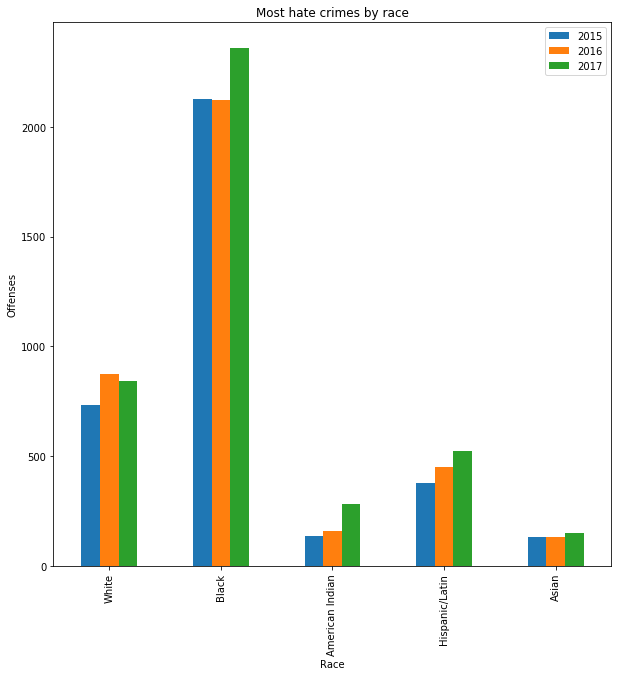

In [6]:
plt_most_crime_by_race =most_crime_by_race.plot(kind = 'bar', x = 'Race',y = ['2015', '2016', '2017'], title = "Most hate crimes by race", figsize = (10,10))
plt_most_crime_by_race.set_xlabel("Race")
plt_most_crime_by_race.set_ylabel("Offenses")

The bar chart shows that Black americans are facing the most hate crimes and asians are facing the lowest amount of hate crimes.

### Chi-Square Test

The purpose of the Chi-Square tests is to see if the distribution of unsolved cases by race is the same as the distribution of reported offenses by race. 

NH - the distributions are the same 
AH - the distributions are different.

In [7]:
most_crime_by_race = pd.DataFrame(np.array([ ["White", H_C2015["Offenses"][3] , H_C2015["Unsolved Cases"][3],H_C2016["Offenses"][3], H_C2016["Unsolved Cases"][3] ,H_C2017["Offenses"][3], H_C2017["Unsolved Cases"][3]],
                                                 ["Black",H_C2015["Offenses"][4] , H_C2015["Unsolved Cases"][4],H_C2016["Offenses"][4], H_C2016["Unsolved Cases"][4] ,H_C2017["Offenses"][4], H_C2017["Unsolved Cases"][4]],
                                                  ["American Indian",H_C2015["Offenses"][5] , H_C2015["Unsolved Cases"][5],H_C2016["Offenses"][5], H_C2016["Unsolved Cases"][5] ,H_C2017["Offenses"][5], H_C2017["Unsolved Cases"][5]],
                                                  ["Hispanic/Latin",H_C2015["Offenses"][10] , H_C2015["Unsolved Cases"][10],H_C2016["Offenses"][10], H_C2016["Unsolved Cases"][10] ,H_C2017["Offenses"][10], H_C2017["Unsolved Cases"][10]],
                                                  ["Asian",H_C2015["Offenses"][6] , H_C2015["Unsolved Cases"][6],H_C2016["Offenses"][6], H_C2016["Unsolved Cases"][6] ,H_C2017["Offenses"][6], H_C2017["Unsolved Cases"][6]]]),
                                                columns = ['Race','2015 offense','2015 unsolved cases','2016 offense','2016 unsolved cases','2017 offense','2017 unsolved cases'])

In [8]:
most_crime_by_race

,Race,2015 offense,2015 unsolved cases,2016 offense,2016 unsolved cases,2017 offense,2017 unsolved cases
0,White,734,53,876,45,844,86
1,Black,2125,520,2122,534,2358,616
2,American Indian,137,24,161,43,281,53
3,Hispanic/Latin,379,54,449,69,525,34
4,Asian,132,24,131,8,152,44


In [9]:
#Converting all columns except "Race" from string to integer
most_crime_by_race["2015 offense"] = pd.to_numeric(most_crime_by_race["2015 offense"])
most_crime_by_race["2015 unsolved cases"] = pd.to_numeric(most_crime_by_race["2015 unsolved cases"])
most_crime_by_race["2016 offense"] = pd.to_numeric(most_crime_by_race["2016 offense"])
most_crime_by_race["2016 unsolved cases"] = pd.to_numeric(most_crime_by_race["2016 unsolved cases"])
most_crime_by_race["2017 offense"] = pd.to_numeric(most_crime_by_race["2017 offense"])
most_crime_by_race["2017 unsolved cases"] = pd.to_numeric(most_crime_by_race["2017 unsolved cases"])

degrees of freedom = (5-1)*(2-1)= 4

Rejection Region: Greater than 9.49


Text(0.5, 0.92, 'Chi-Square Distribution with 10 Degrees of Freedom')

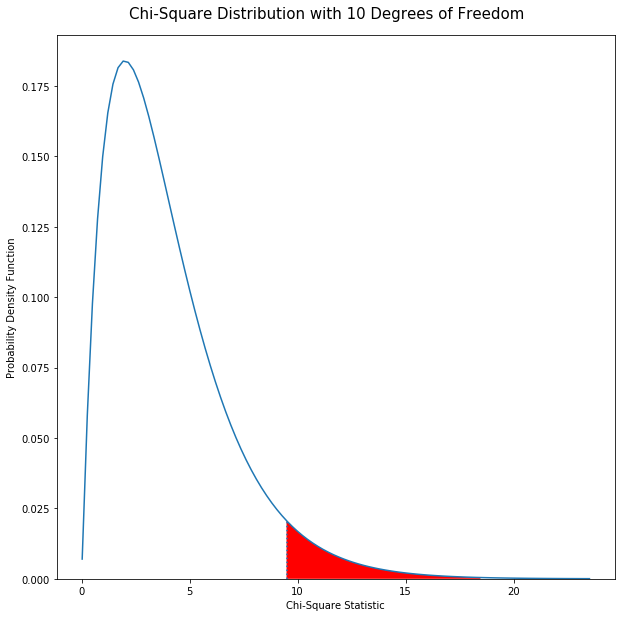

In [10]:
dist = stats.chi2(df=4)
print('Rejection Region: Greater than', np.round(dist.ppf(0.95), 2))
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.plot([dist.ppf(0.95), dist.ppf(0.95)],[0, dist.pdf(dist.ppf(0.95))], linestyle='dotted', color='#1f77b4')
X_fill = np.linspace(dist.ppf(0.95), dist.ppf(0.999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('Chi-Square Statistic')
plt.ylabel('Probability Density Function')
fig.suptitle('Chi-Square Distribution with 10 Degrees of Freedom', fontsize=15, y=0.92)

In [11]:
stats.chi2(df=4).ppf(0.95)

9.487729036781154

We'll reject our null hypothesis that the distributions are the same if our Chi-square statistic is greater than 9.487

###### Chi-square for offense and unsolved cases for the year 2015

In [12]:
stats.chi2_contingency([most_crime_by_race['2015 offense'],most_crime_by_race['2015 unsolved cases']])

(80.19826202061542,
 1.5812528179172674e-16,
 4,
 array([[ 659.97345768, 2218.08106169,  135.01362984,  363.11119082,
          130.82065997],
        [ 127.02654232,  426.91893831,   25.98637016,   69.88880918,
           25.17934003]]))

###### Chi-square for offense and unsolved cases for the year 2016

In [13]:
stats.chi2_contingency([most_crime_by_race['2016 offense'],most_crime_by_race['2016 unsolved cases']])

(137.0203640227843,
 1.2258982468704446e-28,
 4,
 array([[ 775.93938711, 2237.67102298,  171.8693105 ,  436.41324921,
          117.10703019],
        [ 145.06061289,  418.32897702,   32.1306895 ,   81.58675079,
           21.89296981]]))

###### Chi-square for offense and unsolved cases for the year 2017

In [14]:
stats.chi2_contingency([most_crime_by_race['2017 offense'],most_crime_by_race['2017 unsolved cases']])

(121.77801114693216,
 2.2276880512591903e-25,
 4,
 array([[ 774.8447827 , 2477.83697176,  278.27758862,  465.74003605,
          163.30062087],
        [ 155.1552173 ,  496.16302824,   55.72241138,   93.25996395,
           32.69937913]]))

From the Chi-square statistics of 2015, 2016, and 2017, we can see that for all of the years, the results of the statistics were larger than our regection region of 9.487 . So, we can reject our null hypothesis that the distribution of unsolved cases by race is the same as the distribution of reported offenses by race . The two distributions didnt come from the same distributions.

The question then is - which race has a disproportionately high (or low) rate of unsolved cases relative to total offenses?

### Creating a Data Frame and a Bar Chart that shows which race has the most unsolved cases

In [15]:
#Constructing DataFrame of unsolved cases by race and year
unsolved_cases_by_race = pd.DataFrame(np.array([ ["White", H_C2015["Unsolved Cases"][3] ,H_C2016["Unsolved Cases"][3] ,H_C2017["Unsolved Cases"][3]],
                                                 ["Black", H_C2015["Unsolved Cases"][4] ,H_C2016["Unsolved Cases"][4] ,H_C2017["Unsolved Cases"][4]],
                                                  ["American Indian", H_C2015["Unsolved Cases"][5] ,H_C2016["Unsolved Cases"][5] ,H_C2017["Unsolved Cases"][5]],
                                                  ["Hispanic/Latin", H_C2015["Unsolved Cases"][10] ,H_C2016["Unsolved Cases"][10] ,H_C2017["Unsolved Cases"][10]],
                                                  ["Asian", H_C2015["Unsolved Cases"][6] ,H_C2016["Unsolved Cases"][6] ,H_C2017["Unsolved Cases"][6]]]),
                                                columns = ['Race','2015','2016','2017'])

In [16]:
unsolved_cases_by_race

,Race,2015,2016,2017
0,White,53,45,86
1,Black,520,534,616
2,American Indian,24,43,53
3,Hispanic/Latin,54,69,34
4,Asian,24,8,44


In [17]:
#Converting all columns except "Race" to ints
unsolved_cases_by_race["2015"] = pd.to_numeric(unsolved_cases_by_race["2015"])
unsolved_cases_by_race["2016"] = pd.to_numeric(unsolved_cases_by_race["2016"])
unsolved_cases_by_race["2017"] = pd.to_numeric(unsolved_cases_by_race["2017"])


Text(0, 0.5, 'Unsolved Cases')

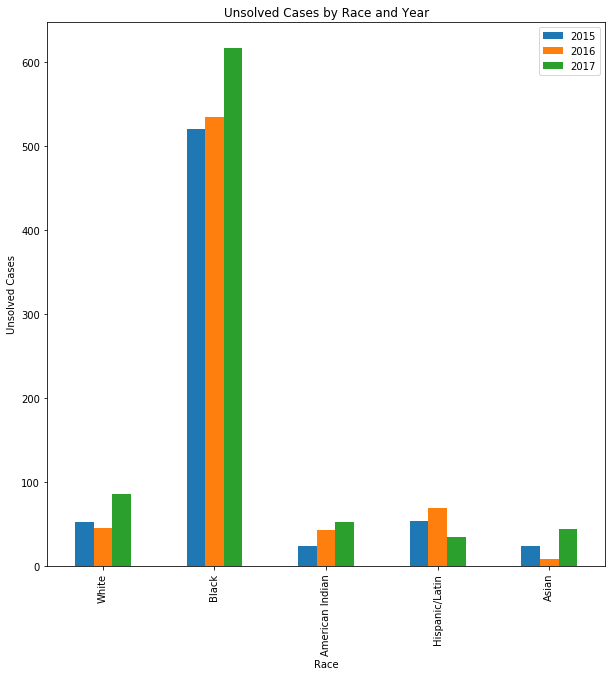

In [18]:
plt_unsolved_cases =unsolved_cases_by_race.plot(kind = 'bar', x = 'Race',y = ['2015', '2016', '2017'], title = "Unsolved Cases by Race and Year", figsize = (10,10))
plt_unsolved_cases.set_xlabel("Race")
plt_unsolved_cases.set_ylabel("Unsolved Cases")

The bar chart shows that black americans have the most unsolved cases. Other races have low amount of unsolved cases. Though we have to understand that Blacks also have the highest amount of hate crimes. So,we have to look for the percentage of unsolved cases.

### Creating a Data Frame and a Bar Chart that shows which race has the largest percentage of unsolved cases

In [19]:
#Constructing DataFrame of Percentage for the unsolved cases by race
percentage_unsolved_cases = pd.DataFrame(np.array([ ["White", H_C2015["Percentage"][3] ,H_C2016["Percentage"][3] ,H_C2017["Percentage"][3]],
                                                 ["Black", H_C2015["Percentage"][4] ,H_C2016["Percentage"][4] ,H_C2017["Percentage"][4]],
                                                  ["American Indian", H_C2015["Percentage"][5] ,H_C2016["Percentage"][5] ,H_C2017["Percentage"][5]],
                                                  ["Hispanic/Latin", H_C2015["Percentage"][10] ,H_C2016["Percentage"][10] ,H_C2017["Percentage"][10]],
                                                  ["Asian", H_C2015["Percentage"][6] ,H_C2016["Percentage"][6] ,H_C2017["Percentage"][6]]]),
                                                columns = ['Race','2015','2016','2017'])

In [20]:
percentage_unsolved_cases

,Race,2015,2016,2017
0,White,7.220708446866484,5.136986301369863,10.189573459715639
1,Black,24.47058823529412,25.164938737040526,26.123833757421544
2,American Indian,17.51824817518248,26.70807453416149,18.86120996441281
3,Hispanic/Latin,14.24802110817942,15.367483296213807,6.476190476190475
4,Asian,18.181818181818183,6.106870229007633,28.947368421052634


In [21]:
#Converting all columns except "Race" to 2 decimal numbers
percentage_unsolved_cases["2015"] = round(pd.to_numeric(percentage_unsolved_cases["2015"]),2)
percentage_unsolved_cases["2016"] = round(pd.to_numeric(percentage_unsolved_cases["2016"]),2)
percentage_unsolved_cases["2017"] = round(pd.to_numeric(percentage_unsolved_cases["2017"]),2)

Text(17.200000000000003, 0.5, 'Percentage of Unsolved Cases')

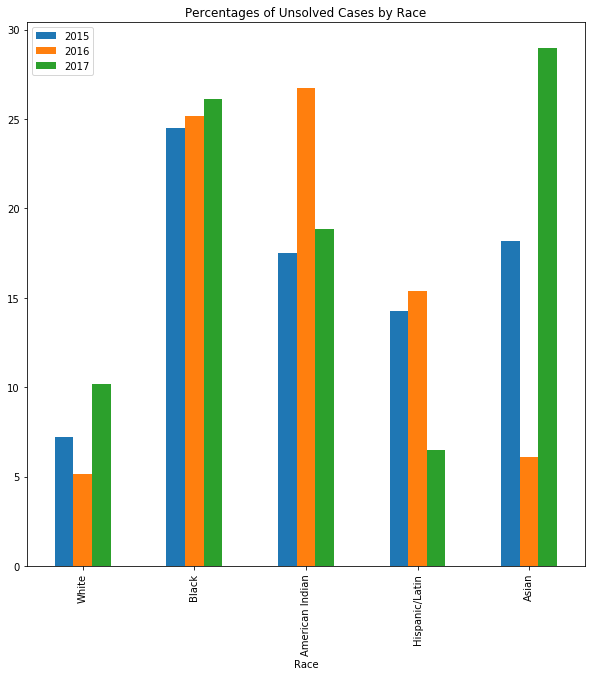

In [22]:
plt_percentage_unsolved_cases =percentage_unsolved_cases.plot(kind = 'bar', x = 'Race',y = ['2015', '2016', '2017'], title = "Percentages of Unsolved Cases by Race", figsize = (10,10))
plt_unsolved_cases.set_xlabel("Race")
plt_unsolved_cases.set_ylabel("Percentage of Unsolved Cases")

This bar chart shows that Percentages of unsolved hate crime cases is lowest among white americans and hispanic/latin whereas its highest among others.

### Creating a Data Frame and a Bar Chart that shows how fast the hate crime is increasing for each race ( 2016 - 2017 )

In [23]:
#Constructing DataFrame of how fast the hate crime is increasing by race (2016-2017)
increase_crime_by_race = pd.DataFrame(np.array([ ["White", (abs(H_C2015["Offenses"][3]-H_C2016["Offenses"][3])/H_C2015["Offenses"][3])*100 , (abs(H_C2016["Offenses"][3]-H_C2017["Offenses"][3])/H_C2016["Offenses"][3])*100],
                                                 ["Black", (abs(H_C2015["Offenses"][4]-H_C2016["Offenses"][4])/H_C2015["Offenses"][4])*100 , (abs(H_C2016["Offenses"][4]-H_C2017["Offenses"][4])/H_C2016["Offenses"][4])*100],
                                                  ["American Indian",(abs(H_C2015["Offenses"][5]-H_C2016["Offenses"][5])/H_C2015["Offenses"][5])*100 , (abs(H_C2016["Offenses"][5]-H_C2017["Offenses"][5])/H_C2016["Offenses"][5])*100],
                                                  ["Hispanic/Latin",(abs(H_C2015["Offenses"][10]-H_C2016["Offenses"][10])/H_C2015["Offenses"][10])*100 , (abs(H_C2016["Offenses"][10]-H_C2017["Offenses"][10])/H_C2016["Offenses"][10])*100],
                                                  ["Asian",(abs(H_C2015["Offenses"][6]-H_C2016["Offenses"][6])/H_C2015["Offenses"][6])*100 , (abs(H_C2016["Offenses"][6]-H_C2017["Offenses"][6])/H_C2016["Offenses"][6])*100]]),
                                                columns = ['Race','2015-2016','2016-2017'])

In [24]:
increase_crime_by_race

,Race,2015-2016,2016-2017
0,White,19.346049046321525,3.65296803652968
1,Black,0.1411764705882353,11.121583411875589
2,American Indian,17.51824817518248,74.53416149068323
3,Hispanic/Latin,18.46965699208443,16.926503340757236
4,Asian,0.7575757575757576,16.030534351145036


In [25]:
#Converting all columns except "Race" to 2 decimal numbers
increase_crime_by_race["2015-2016"] = round(pd.to_numeric(increase_crime_by_race["2015-2016"]),2)
increase_crime_by_race["2016-2017"] = round(pd.to_numeric(increase_crime_by_race["2016-2017"]),2)


Text(0, 0.5, 'Percentage of Increase')

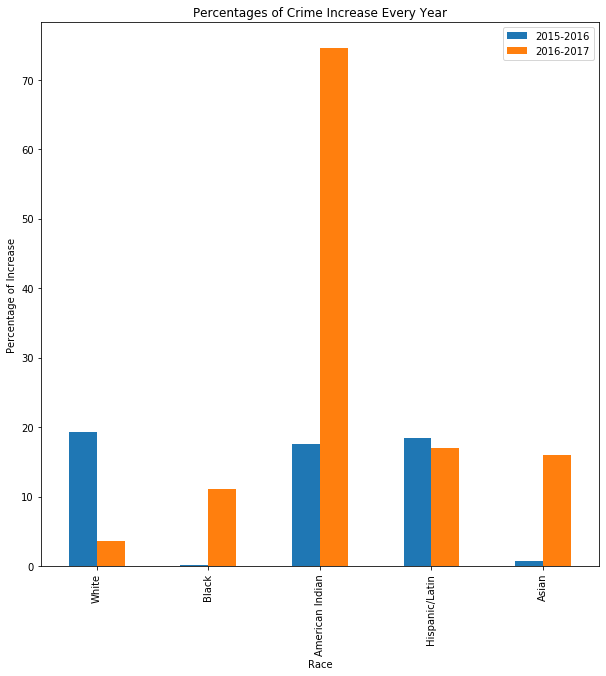

In [26]:
plt_increase_crime_by_race =increase_crime_by_race.plot(kind = 'bar', x = 'Race',y = ['2015-2016', '2016-2017'], title = "Percentages of Crime Increase Every Year", figsize = (10,10))
plt_increase_crime_by_race.set_xlabel("Race")
plt_increase_crime_by_race.set_ylabel("Percentage of Increase")

from the bar chart, we can see that crime against White americans decreased while crime against American Indian , African Americans and Asians increased.

### Conclusion


In conclusion, we can say that hate crime against African Americans is the highest among other races and is increasing comparatively fast . Also, most of the crimes against African Americans are unsolved.While the percentage of unsolved cases against White Americans is 5-10% , the percentage of unsolved cases against Black Americans is 25-30%.

#### Self-Assessment

One thing I enjoyed about the project was that it let me explore different interesting topics and analyze the topic and come up with answers based on the data available. It was interesting to come up with different questions needed to be answered just from a table. It was also interesting to apply the theorems and hypothesis tests we learned on class in these data sets. Hard part of the project was to explain what the statistics mean and how to interpret them correctly. Another problem I faced was during data pull. Some data in the website were unavailable or was not accessible and some data were not available for years prior to 2015. So, I had to work with limited data sets.  If I had more data sets, my statistics could have been more precise or may be something totally different. Another problem I faced was that the questions I had could easily be solved with bar charts. I was having trouble to use the data sets in different hypothesis test and regression models since I didn’t have any continuous data sets. Overall the project was fun and gave me some experience about analyzing new data from real world.